# California Housing Prices – Data Preprocessing & EDA

This notebook covers:
- Loading the dataset
- Fixed train/validation/test split (70/15/15)
- Feature scaling
- Exploratory Data Analysis (EDA)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
X = df.drop("MedHouseVal",axis=1)
y = df["MedHouseVal"]

In [26]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Second split: 15% val, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(14448, 8) (3096, 8) (3096, 8)


In [27]:
X_train.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [29]:
import joblib

joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

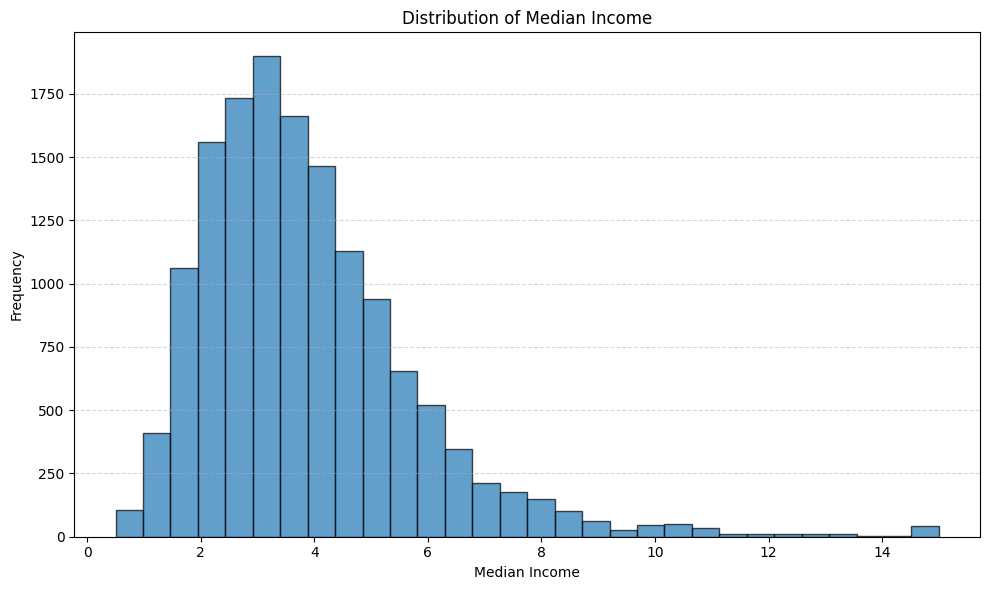

In [30]:
plt.figure(figsize=(10,6))

plt.hist(X_train["MedInc"], 
         bins=30, 
         edgecolor="black", 
         alpha=0.7)

plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

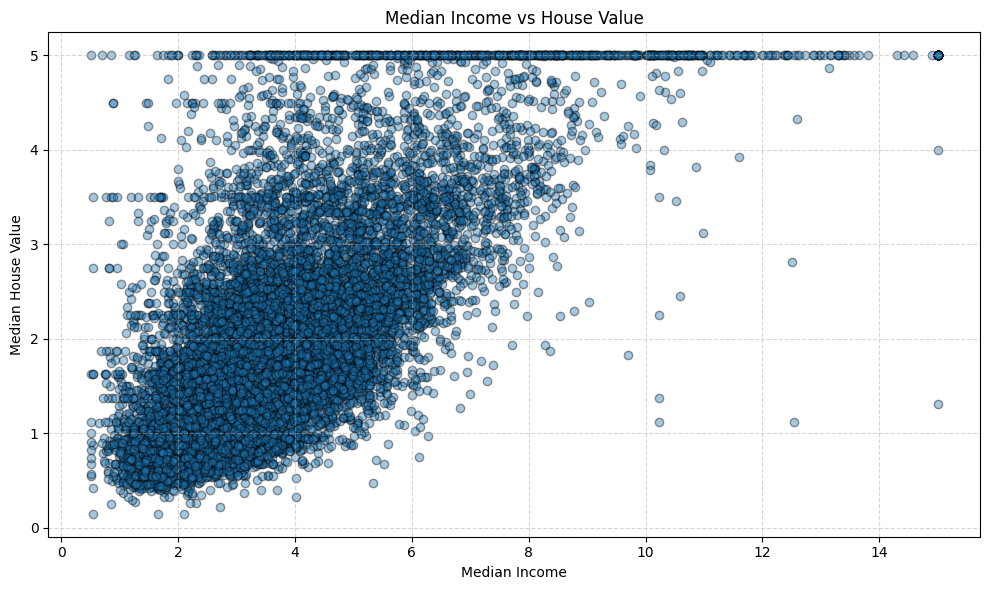

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(X_train["MedInc"], y_train, 
            alpha=0.4, 
            edgecolors="black")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs House Value")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

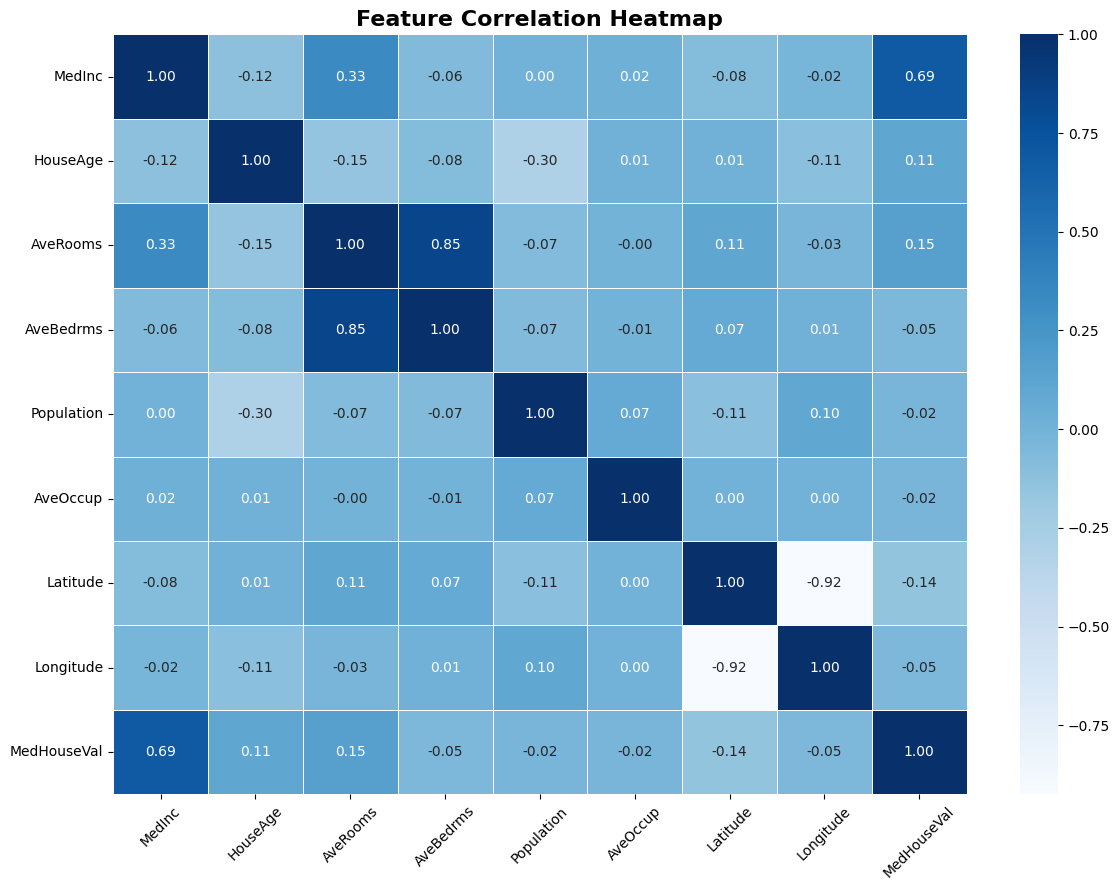

In [34]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), 
            cmap="Blues", 
            annot=True, 
            fmt=".2f", 
            linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
joblib.dump(
    (X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test),
    "../models/processed_data.pkl"
)

['../models/processed_data.pkl']